<a href="https://colab.research.google.com/github/teechoi/open-source-cs/blob/master/Python_Tips_%26_Tricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Become a Python Expert: it's as easy as 0, 1, 2!


Hopefully this will be helpful for everyone, whether you're a beginner or pretty experienced. This collection doesn't go over specifics of how to do things which are easily Google-able, rather it provides a list of tips and tricks that people would never realize exist.
Note: Run "Helpers for this notebook" before running examples.

Helpful Links:
*   https://gto76.github.io/python-cheatsheet/
*   https://www.pythoncheatsheet.org/

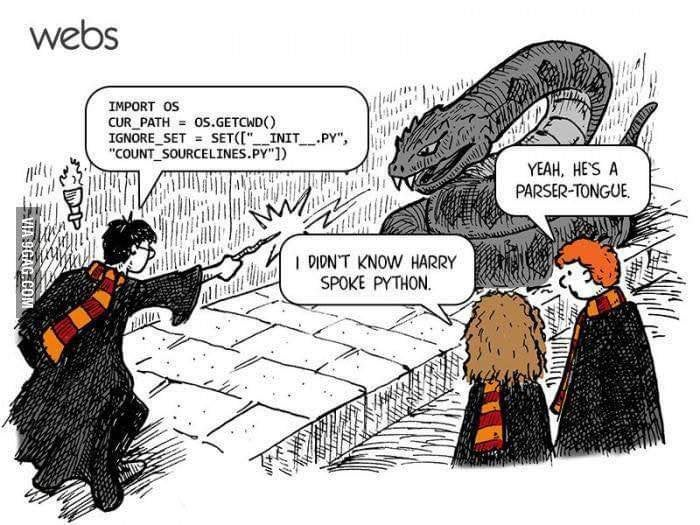

Collection curated by Kenny Kim for NASA PAXC, April 2021

###### Helpers for this notebook

In [ ]:
def dprint(*args): # Emulating Python 3.8's debug prints
  vars = []
  for arg in args:
    for var in arg.split(';'):
      vars += [var.strip()]
  
  max_name_length = max(list(map(lambda x: len(x), vars)))
  for var in vars:
    print(f'{var.rjust(max_name_length)} = {str(eval(var))}')
  print('-' * 80)

from math import *
from functools import reduce

# =Generic Helper Functions=
def find_factors(num):
    return [num]+[i for i in range(ceil(num/2)+1, 1, -1) if num % i == 0][1:]

def find_gcf(num1, num2):
    smaller = min(num1, num2)
    larger = max(num1, num2)
    for i in find_factors(smaller):
        if larger % i == 0: return i
    return -1

def find_lcm(num1, num2):
    lcm = reduce((lambda x, y: x*y), set(find_factors(num1) + find_factors(num2)))
    return lcm, lcm/num1, lcm/num2

## Variables

##### Augmented Assignment [Basic]

In [ ]:
a = 5//2 # Divide and round down
a += 1 # Can be done with any math or binary operator

# I'm gonna use my custom dprint a lot because Google Colab doesn't have
#  Python 3.8 and debug prints
dprint('a')

a = 3
--------------------------------------------------------------------------------


##### Multiple Assignment [Basic]

In [ ]:
a = b = 5+3j # Oh yeah, Python natively supports complex numbers
dprint('a; b')

a = (5+3j)
b = (5+3j)
--------------------------------------------------------------------------------


##### First Class Functions [Basic]

In [ ]:
def add_two_numbers(x, y):
  return x+y

c = add_two_numbers # Saving a function as a variable
dprint('c(a, b)') # And calling the variable as if it was the function

c(a, b) = (10+6j)
--------------------------------------------------------------------------------


##### Pass By Value vs Pass By Reference [Basic]

In [ ]:
list_1 = [1, 2]
list_2 = list_1 # This just set list_2 to point to the same object as list_1
list_2[0] = 3
dprint('list_1') #Wait, we changed list_2, not list_1


import copy
list_1 = [1, 2]
list_2 = copy.copy(list_1) # This makes list_2 point to a new object with the same values as list_1
# Can also do list_2 = list_1[:] for lists specifically
list_2[0] = 3
dprint('list_1')

list_1 = [3, 2]
--------------------------------------------------------------------------------
list_1 = [1, 2]
--------------------------------------------------------------------------------


## Iterables, Indexing, and Combinatorics

##### List/Dictionary Creation [Basic]


In [ ]:
print([0, 1]*5)
print(list(range(7)))

lst = ['Hello']
lst += ['There'] # Instead of .append(), +=[] is shorter
lst += [{'General': 'Kenobi'}] # You can add different types to the same list

import os
class Thingey:
  def __init__(self, num):
    self.num = num
  def get_num(self):
    return self.num

thing = Thingey(5)
# Anything hashable can be a key, even a module, class, function, or object
print({os: 0, Thingey: 0, Thingey.get_num: 0, thing: 0})

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[0, 1, 2, 3, 4, 5, 6]
{<module 'os' from '/usr/lib/python3.7/os.py'>: 0, <class '__main__.Thingey'>: 0, <function Thingey.get_num at 0x7f87a7287050>: 0, <__main__.Thingey object at 0x7f87a73a65d0>: 0}


##### Indexing [Basic]

In [ ]:
names = ["Alice", "Bob", "Chuck", "Dan", "Erin", "Frank", "Grace"]
print(names[3:7]) #[first:last:interval]
print(names[1:]) # == names[1:len(names)]

midpoint = len(names)//2
print(names[:midpoint], names[midpoint:]) # Effectively splits a list down the middle
print(names[::2]) # Skips every second item
print(names[1::2]) # Only gets every second item
print(names[1:-1]) # Excludes first and last item
print(names[::-1]) # Reverse

['Dan', 'Erin', 'Frank', 'Grace']
['Bob', 'Chuck', 'Dan', 'Erin', 'Frank', 'Grace']
['Alice', 'Bob', 'Chuck'] ['Dan', 'Erin', 'Frank', 'Grace']
['Alice', 'Chuck', 'Erin', 'Grace']
['Bob', 'Dan', 'Frank']
['Bob', 'Chuck', 'Dan', 'Erin', 'Frank']
['Grace', 'Frank', 'Erin', 'Dan', 'Chuck', 'Bob', 'Alice']


##### Dictionary Defaults [Intermediate]

In [ ]:
shuttle_ende = {
    'name': 'Endeavour',
    'year_delivered': 1991,
    'ov_designation': 'OV-105'}

# Since there is no "mission_count" field, the following line would error out
#print(shuttle_ende['mission_count']) -> KeyError: 'mission_count'

# Setdefault adds a default value to return if the field doesn't exist
shuttle_ende.setdefault('mission_count', 0) # Default for "mission_count" is now 0
print(shuttle_ende['mission_count'])
shuttle_ende['mission_count'] = 25
print(shuttle_ende['mission_count']) # Returns actual value now that it has been assigned

# get() is an alternative to traditional indexing that can take a default to return
#  but the default is not permenant. 
print(shuttle_ende.get('status', 'Retired')) 

#Defaultdict is fantastic, it creates key value pairs if the key does not exist
voyager_vists = {
    'Voyager 1': ['Jupiter', 'Saturn'],
    'Voyager 2': ['Jupiter', 'Saturn', 'Uranus', 'Neptune']}

from collections import defaultdict
planets = defaultdict(list)
for spacecraft in voyager_vists.keys():
  for planet in voyager_vists[spacecraft]:
    planets[planet].append(spacecraft) # We can append to something that might not exist yet?
print(planets)
print(dict(planets)) # Cast as normal dictionary

# For comparison, this is the traditional equivalent:
# planets = {}
# for spacecraft in voyager_vists.keys():
#   for planet in voyager_vists[spacecraft]:
#     if planets[planet]:
#       planets[planet] = []
#     else:
#       planets[planet].append(spacecraft)

0
25
Retired
defaultdict(<class 'list'>, {'Jupiter': ['Voyager 1', 'Voyager 2'], 'Saturn': ['Voyager 1', 'Voyager 2'], 'Uranus': ['Voyager 2'], 'Neptune': ['Voyager 2']})
{'Jupiter': ['Voyager 1', 'Voyager 2'], 'Saturn': ['Voyager 1', 'Voyager 2'], 'Uranus': ['Voyager 2'], 'Neptune': ['Voyager 2']}


##### Comprehensions [Basic]

In [ ]:
# Comprehensions are a much shorter way of writing for loops
print([x ** 2 for x in range(5)]) # List
# Equivalent to:
#     listOfNums = []
#     for x in range(5):
#         listOfNums += [x ** 2]
#     print(listOfNums)
print({x ** 2 for x in range(5)}) # Set
print({x: x ** 2 for x in range(5)}) # Dict
print((x ** 2 for x in range(5))) # Generator
print([x ** 2 if not x % 2 else None for x in range(5)]) # Can use ternaries
print([x ** 2 for x in range(5) if not x % 2]) # You don't have to use an else if you move the if

[0, 1, 4, 9, 16]
{0, 1, 4, 9, 16}
{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}
<generator object <genexpr> at 0x7f87a74afd50>
[0, None, 4, None, 16]
[0, 4, 16]


##### Advanced Iteration [Intermediate]

In [ ]:
# Enumerate yields the current index and the value
phonetic_alphabet = ['Alpha', 'bravo', 'charlie', 'Delta', 'echo']
for index, value in enumerate(phonetic_alphabet):
  print(index, value)
  if not value[0].isupper():
    phonetic_alphabet[index] = value.capitalize() # Having index makes it easier to replace elements, better than using .find
print(phonetic_alphabet)


# Zip merges two iterables together
# zip(['a', 'b'], [1, 2]) == (('a', 1), ('b', 2))
first_letters = [word[0] for word in phonetic_alphabet]
dprint('first_letters')
dprint('list(zip(first_letters, phonetic_alphabet))')
dprint('dict(zip(first_letters, phonetic_alphabet))')

0 Alpha
1 bravo
2 charlie
3 Delta
4 echo
['Alpha', 'Bravo', 'Charlie', 'Delta', 'Echo']
first_letters = ['A', 'B', 'C', 'D', 'E']
--------------------------------------------------------------------------------
list(zip(first_letters, phonetic_alphabet)) = [('A', 'Alpha'), ('B', 'Bravo'), ('C', 'Charlie'), ('D', 'Delta'), ('E', 'Echo')]
--------------------------------------------------------------------------------
dict(zip(first_letters, phonetic_alphabet)) = {'A': 'Alpha', 'B': 'Bravo', 'C': 'Charlie', 'D': 'Delta', 'E': 'Echo'}
--------------------------------------------------------------------------------


##### Packing/Unpacking [Advanced]

In [ ]:
# The splat operator unpack an iterable into separate values and vice versa
nums = [1, 2, 3]
print(nums) # 1 value which is a list
print(*nums) # Now unpacked into 3 separate values

#Can use it to split lists
first, *rest = ["Alice", "Bob", "Chuck", "Dan", "Erin", "Frank", "Grace"]
dprint('first; rest')
first, second, third, *rest, second_to_last, last = ["Alice", "Bob", "Chuck", "Dan", "Erin", "Frank", "Grace"]
dprint('first; second; third; rest; second_to_last; last')

# Can use the splat operator to get an arbitrary number of arguments
def add_any_numbers(*args):
  print(args)
  print(*args)
  total = 0
  for arg in args:
    total += arg
  return total

dprint('add_any_numbers(17, 2)')
dprint('add_any_numbers(17, 2, 38, 41, 6)')


# Can also use it to combine things
dict_a = {'a': 1}
dict_b = {'b': 2}
print({**dict_a, **dict_b})

[1, 2, 3]
1 2 3
first = Alice
 rest = ['Bob', 'Chuck', 'Dan', 'Erin', 'Frank', 'Grace']
--------------------------------------------------------------------------------
         first = Alice
        second = Bob
         third = Chuck
          rest = ['Dan', 'Erin']
second_to_last = Frank
          last = Grace
--------------------------------------------------------------------------------
(17, 2)
17 2
add_any_numbers(17, 2) = 19
--------------------------------------------------------------------------------
(17, 2, 38, 41, 6)
17 2 38 41 6
add_any_numbers(17, 2, 38, 41, 6) = 104
--------------------------------------------------------------------------------
{'a': 1, 'b': 2}


##### Itertools [Advanced]

In [ ]:
import itertools
letters = ['a', 'b', 'c']
numbers = [1, 2, 3]
for index, letter in enumerate(itertools.cycle(letters)):
  print(index, letter)
  if index == 6: break

# Combinations returns a grouping of all possible combinations
print(list(itertools.combinations(letters, 2))) 
print(list(itertools.combinations_with_replacement(letters, 2)))
# Product returns all possible combos of two iterables
print(list(itertools.product(letters, numbers)))

0 a
1 b
2 c
3 a
4 b
5 c
6 a
[('a', 'b'), ('a', 'c'), ('b', 'c')]
[('a', 'a'), ('a', 'b'), ('a', 'c'), ('b', 'b'), ('b', 'c'), ('c', 'c')]
[('a', 1), ('a', 2), ('a', 3), ('b', 1), ('b', 2), ('b', 3), ('c', 1), ('c', 2), ('c', 3)]


## Strings and Printing

##### Strings [Intermediate]

In [ ]:
hello = 'Hello, World! ' 
print(hello[1:-5:2]) # Can index like any iterable
hello_again =  hello * 2 #Can repeat like any iterable
print(hello_again)

# f-strings are super handy in Python 3.6
print(f'I want to say: "{hello}"') 
#  they insert values inline, aka string interpolation
price = 51063825.358
print(f'${price:,.2f}') # You can add format specifiers
# The "," adds thousands separation commas
# The ".2f" rounds the number to 2 decimal places
for num in range(1, 5):
  print(f'{num:0{num}}') # You can even format the specifiers!!
  # The ":0_" means pad left with "0" until it is "_" characters long

pin_num = '1925'
# The following are useful functions for checking user input
dprint('pin_num.isalpha(); pin_num.isnumeric(); pin_num.isalnum()')

# Justification is great for display charts/tables
print('Right'.rjust(20), '|')
print('Center'.center(20), '|')
print('Left'.ljust(20), '|')

el,W
Hello, World! Hello, World! 
I want to say: "Hello, World! "
$51,063,825.36
1
02
003
0004
  pin_num.isalpha() = False
pin_num.isnumeric() = True
  pin_num.isalnum() = True
--------------------------------------------------------------------------------
               Right |
       Center        |
Left                 |


##### Printing [Intermediate]

In [ ]:
print('Loading... ', end='') # End parameter replaces the default newline with any string
print('Done!')

print(1, 2, 3, sep='; ') # Separator parameter replaces the default space with any string

companies = {
    'Rocket Lab': {
        'founding': 2006,
        'rockets': ['Electron']},
    'Blue Origin': {
        'founding': 2000,
        'rockets': ['New Shepard', 'New Glenn']},
    'SpaceX': {
        'founding': 2002,
        'rockets': ['Falcon 1', 'Falcon 9', 'Starship']}}

print(companies) # Print is terrible in this case because it is all on one line

import pprint # Pprint is very good for 1-layer dictionaries
pprint.pprint(companies) # Note that it sorts keys alphabetically
#pformat is to get the resulting string

import json
print(json.dumps(companies, indent=1)) # Use json.dumps and indent for recursive indents

Loading...Done!
1; 2; 3
{'Rocket Lab': {'founding': 2006, 'rockets': ['Electron']}, 'Blue Origin': {'founding': 2000, 'rockets': ['New Shepard', 'New Glenn']}, 'SpaceX': {'founding': 2002, 'rockets': ['Falcon 1', 'Falcon 9', 'Starship']}}
{'Blue Origin': {'founding': 2000, 'rockets': ['New Shepard', 'New Glenn']},
 'Rocket Lab': {'founding': 2006, 'rockets': ['Electron']},
 'SpaceX': {'founding': 2002, 'rockets': ['Falcon 1', 'Falcon 9', 'Starship']}}
{
 "Rocket Lab": {
  "founding": 2006,
  "rockets": [
   "Electron"
  ]
 },
 "Blue Origin": {
  "founding": 2000,
  "rockets": [
   "New Shepard",
   "New Glenn"
  ]
 },
 "SpaceX": {
  "founding": 2002,
  "rockets": [
   "Falcon 1",
   "Falcon 9",
   "Starship"
  ]
 }
}


##### Terminal [Intermediate]

In [ ]:
# Who doesn't love some colors?
!pip install termcolor
from termcolor import colored, cprint
print(colored('Warning!', 'red', 'on_yellow', ['bold', 'underline']))

# Ooh, or a progress bar!
!pip install tqdm
from tqdm import tqdm
from time import sleep
for i in tqdm(range(0, 40), desc='Jaws dropping', unit='drops'):
    sleep(0.1)

Warning!


Jaws dropping: 100%|██████████| 40/40 [00:04<00:00,  9.81drops/s]


## Conditionals


##### Truthy and Falsy [Basic]

In [ ]:
# Falsy means that even thought the values are not the boolean False, they evaluate
#  to False when used for conditionals (if's, while's, ternaries, etc.)
print('None:',   bool(None))
print('Int:',    bool(0),   bool(-2)) # 0's are Falsy
print('Float:',  bool(0.0), bool(0.0001))
print('List:',   bool([]),  bool([None])) #E mpty iterables (including strings) are Falsy
print('String:', bool(''),  bool(' '))
# Besides these, almost everything else evaluates to True

if '':
  print('I guess empty strings are truthy')
else:
  print('I guess empty strings are falsy')

print(True * 5) # By the way, True is really just 1, which makes some fun possible later on...

None: False
Int: False True
Float: False True
List: False True
String: False True
I guess empty strings are falsy
5


##### Ternary and Coalescing [Intermediate]

In [ ]:
num = 5

# Traditional ternary
print('odd' if num % 2 else 'even')

# Equivalent to but way shorter than:
# if num % 2:
#   print('odd')
# else:
#   print('even')

# This is slower and less efficient but more fun: 
print(('even', 'odd')[num % 2 == True]) # False evaluates to 0 and True evaluates to 1


# Python has some weird behavior with "or" and "and", you can use them as defaults
#  "or" will use the first value that is true, "and" will use the last
port = input('Port (press enter for default): ') or '3000'
print(port)
print(3 and 2 and 5)

odd
odd
Port (press enter for default): 2134
2134
0


##### Any/All [Basic]

In [ ]:
# Any returns True if any of the provided iterable evaluates to True
print(any([0, False, 0.0, 0j, {}, [], '']))
# All returns True if... well you get the point
print(all(planet[0].isupper() for planet in ['Earth', 'Mars', 'Jupiter', 'Saturn']))

False
True


## Functions

##### Function Declarations [Intermediate]

In [ ]:
# Traditional functions:
def add_two_numbers(x, y):
  return x+y
print(add_two_numbers(1, 2))

# Same function but as a lambda
add_two_numbers_lam = lambda x, y: x + y
print(add_two_numbers_lam(1, 2))

# Great as inline arguments
from functools import reduce
print(reduce(lambda x, y: x * y, range(1, 6)))

# Partials fix values to certain arguments of a function call
from functools import partial
add_five = partial(add_two_numbers, y=5)
print(add_five(7))



3
3
120
12


##### Special Functions [Advanced]

In [ ]:
# Generator functions use "yield", which returns a result while not closing the function
#  This allows it to be called again and know the state of its last call
def fibonacci():
    cache = [0, 1] # [total, last total]
    while True:
        cache = [cache[0] + cache[1], cache[0]] # Change cache
        yield cache[0] # Return total

for i in fibonacci():
  if i > 15:
    break
  print(i)

1
1
2
3
5
8
13


In [ ]:
# Closures are another way of binding state
def register_user(name):
  def greet():
    return f'Hello {name}!' # The name variable comes from the outer scope
  def message(text):
    return f'{name} says: {text}' # While text here is an argument
  return greet, message # Yup, we're returning functions

greet, message = register_user('Kenny')
print(greet())
print(message('I hate sand...'))

Hello Kenny!
Kenny says: I hate sand...


In [ ]:
# Decorators are basically closures, and allow things to happen before and after
#  a function is called
def user_logging(func):
    def logging(*args):
        print("Logging in...")
        func(*args) #Calling the provided function
        print("Logged out.")
    return logging # We're returning the function we just created

@user_logging #This is a nicer way of writing user_logging(lambda text: ...)
def send_message(text):
  print(message(text))

send_message("It's all coarse, and rough, and irritating. ")

Logging in...
Kenny says: It's all coarse, and rough, and irritating. 
Logged out.


## Classes & Dunders

##### Dunders [Intermediate]

In [ ]:
# Dunders (short for "double underscore") are special builtin functions and 
#  constants in Python. One thing you can use them for is overriding Python operators.
class Fraction:
  def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator

  # =Helper Functions=
  def simplify(self):
    gcf = find_gcf(self.numerator, self.denominator)
    if gcf == -1: return self
    return Fraction(self.numerator // gcf, self.denominator // gcf)

  def decimal(self):
    return self.numerator/self.denominator

  # =Magic Functions=
  def __add__(self, other): # Overrides self+other
    denominator, res1, res2 = find_lcm(self.denominator, other.denominator)
    return Fraction(int(res1 * self.numerator + res2 * other.numerator), denominator).simplify()

  def __eq__(self, other): # Overrides self==other
    self_simple = self.simplify()
    other_simple = other.simplify()
    return self_simple.numerator == other_simple.numerator and self_simple.denominator == other_simple.denominator

  def __ge__(self, other): # Overrides self>=other
    return self.decimal() >= other.decimal()

  def __pow__(self, power, modulo=None): # Overrides self**other
    return Fraction(self.numerator ** power, self.denominator ** power)

  def __neg__(self): # Overrides -self
    return Fraction(-1 * self.numerator, self.denominator)

  def __abs__(self): # Overrides abs(self)
    return Fraction(abs(self.numerator), abs(self.denominator))

  def __str__(self): # Overrides str(self)
    return f'{self.numerator}/{self.denominator}'

  def __repr__(self): # Overrides self.__repr__()
    return f'Fraction({self.numerator}, {self.denominator})'

  def __getattr__(self, item): # If the interpreter can't find attribute in object, it returns this.
    print(f'Sorry, {item} doesn\'t exist in Fraction')
    return 1

# Testing dunders now
half = Fraction(1, 2)
third = Fraction(1, 3)
dprint('half + third')
two_quarters = Fraction(2, 4)
dprint('half == two_quarters')
dprint('half >= third')
dprint('half ** 2')
dprint('-half')
dprint('abs(-half)')
dprint('half') # Print defaults to using str(self), and if __str__ does not exist, uses __repr__
dprint('half.__repr__()') # Repr is supposed syntactically be so that doing eval(obj.__repr__()) will return a new object
dprint('half.foo')

half + third = 5/6
--------------------------------------------------------------------------------
half == two_quarters = True
--------------------------------------------------------------------------------
half >= third = True
--------------------------------------------------------------------------------
half ** 2 = 1/4
--------------------------------------------------------------------------------
-half = -1/2
--------------------------------------------------------------------------------
abs(-half) = 1/2
--------------------------------------------------------------------------------
half = 1/2
--------------------------------------------------------------------------------
half.__repr__() = Fraction(1, 2)
--------------------------------------------------------------------------------
Sorry, foo doesn't exist in Fraction
half.foo = 1
--------------------------------------------------------------------------------


##### Duck Typing [Advanced]

In [ ]:
# Duck Typing means that as long as you implement behavior that make your class 
#  act like a certain type, it might as well be it. This is a dynamic programming
#  alternative to inheriting built-in classes.

class Countdown:
  def __init__(self, start):
    self.count = start
  def __iter__(self): # Iter initializes things needed for iteration and returns self
    return self
  def __next__(self): # Self returns next item
    if self.count < 0: 
      raise StopIteration
    self.count -= 1
    return self.count + 1

for i in Countdown(5):
  print(i)

# Other Duck Types:
#  Callable: __call__
#  Maps: __getitem__ 
#  With: __enter__, __exit__
#  More here:
#   https://docs.python.org/3/reference/datamodel.html#emulating-container-types

5
4
3
2
1
0


##### Dataclasses [Advanced]

In [ ]:
class Planet:
  def __init__ (self, name, moons):
    self.name = name # Syntax is somewhat redundant
    self.moons = moons

earth = Planet('earth', 1)
earth_duplicate = Planet('earth', 1)
print(earth)
print(earth_duplicate)
print(earth==earth_duplicate) # Is false because object addresses are not the same


# Dataclasses automatically define __init__, __repr__, and __eq__, can also
#  define more order and hash methods
from dataclasses import dataclass
#Equivalent class
@dataclass
class Planet: # Notice no init defined here
  name : str
  moons : int

earth = Planet('earth', 1)
earth_duplicate = Planet('earth', 1)
print(earth) # __repr__ now returns tuple instead of object address
print(earth_duplicate)
print(earth==earth_duplicate) # Is true because tuple values are the same

False
Planet(name='earth', moons=1)
Planet(name='earth', moons=1)
True


## Debugging

##### Extracting Information [Intermediate]

In [ ]:
class PoorlyDocumentedClass:
  """I neeed more documentation"""
  # Any string that starts with """ right after header is a docstring
  def __init__(self, field):
    self.field = field
  def return_field(self):
    return self.field

poorly_documented_object = PoorlyDocumentedClass('Hello')

dprint('type(poorly_documented_object)') # Get type
dprint('dir(poorly_documented_object)') # Get all fields and methods
dprint('poorly_documented_object.__dict__') # Get fields
dprint('poorly_documented_object.__doc__') # Get docstring
dprint('PoorlyDocumentedClass.__name__') # Get name of class

# With inspect module
import inspect
dprint('inspect.getmembers(poorly_documented_object, inspect.ismethod)') #Get methods
dprint('inspect.getmembers(poorly_documented_object)') # Get all methods
dprint('inspect.getdoc(poorly_documented_object)') # Get docstring
dprint('inspect.getfullargspec(PoorlyDocumentedClass)') # Get Arguments

type(poorly_documented_object) = <class '__main__.PoorlyDocumentedClass'>
--------------------------------------------------------------------------------
dir(poorly_documented_object) = ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'field', 'return_field']
--------------------------------------------------------------------------------
poorly_documented_object.__dict__ = {'field': 'Hello'}
--------------------------------------------------------------------------------
poorly_documented_object.__doc__ = I neeed more documentation
--------------------------------------------------------------------------------
PoorlyDocumentedClass.__name__ = PoorlyDocumentedClass
----------------------------

##### Doctest [Advanced]

In [ ]:
# Doctest is a built-in Python freature where unit test as if it was run in the
#  console is written in the docstring
def factorial(n):
  """Return the factorial of n, an exact integer >= 0.

  >>> [factorial(n) for n in range(6)]
  [1, 1, 2, 6, 24, 120]
  >>> factorial(30)
  265252859812191058636308480000000
  >>> factorial(-1)
  Traceback (most recent call last):
    ...
  ValueError: n must be >= 0

  Factorials of floats are OK, but the float must be an exact integer:
  >>> factorial(30.1)
  Traceback (most recent call last):
    ...
  ValueError: n must be exact integer
  >>> factorial(30.0)
  26525285981219105863630848000000

  It must also not be ridiculously large:
  >>> factorial(1e100)
  Traceback (most recent call last):
    ...
  OverflowError: n too large
  """

  import math
  if not n >= 0:
    raise ValueError("n must be >= 0")
  if math.floor(n) != n:
    raise ValueError("n must be exact integer")
  if n+1 == n:  # catch a value like 1e300
    raise OverflowError("n too large")
  result = 1
  factor = 2
  while factor <= n:
    result *= factor
    factor += 1
  return result


import doctest
doctest.testmod()

**********************************************************************
File "__main__", line 19, in __main__.factorial
Failed example:
    factorial(30.0)
Expected:
    26525285981219105863630848000000
Got:
    265252859812191058636308480000000
**********************************************************************
1 items had failures:
   1 of   6 in __main__.factorial
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=6)

##### Logging [Intermediate]

In [ ]:
import logging

logging.basicConfig(filename='file.log', filemode='w+', format='%(name)s - %(levelname)s - %(message)s')
logging.debug('This is a debug message')
logging.info('This is an info message')
logging.warning('This is a warning message')
logging.error('This is an error message')
logging.critical('This is a critical message')

##### PDB (Python Debugger) [Advanced]

In [ ]:
print('Starting program')
import pdb
print(1)
# Start debugger
pdb.set_trace()
# Use s(tep), n(next), c(continue), u(p), etc.
print(2)
print(3)

##### Traceback [Advanced]

In [ ]:
import traceback
import sys
  
A = [1, 2, 3, 4]
try:
    value = A[5]
except:
    traceback.print_exc() # Line and file in question
    traceback.print_stack() # Stack trace

tb.__cause__ = None
--------------------------------------------------------------------------------
tb.__context__ = None
--------------------------------------------------------------------------------


Traceback (most recent call last):
  File "<ipython-input-36-3a60b27fcdfc>", line 6, in <module>
    value = A[5]
IndexError: list index out of range
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 1786, in _run_

##### Pyperclip (Copy/Paste) [Basic]

In [ ]:
# Pyperclip is a Python module that can programmatically copy to clipboard.
#  One fun way to use it is to catch and copy exceptions for easy Googling.

!pip install pyperclip
import pyperclip

try:
  [1, 4][2]
except Exception as e:
  #pyperclip.copy(e) Does not work in Google Colaboratory :(
  print(e)

list index out of range
